In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
def get_numbers(line, limit = -1):
    new_digit = ''
    numbers = []
    is_neg = False
    for i in range(len(line)):
        c = line[i]
        if i < len(line) - 1 and c == '-' and line[i + 1].isdigit():
            is_neg = True
        if c.isdigit() or (c == '.' and new_digit != ''):
            new_digit += c
        if new_digit != '' and c != '.' and (i == len(line) - 1 or not c.isdigit()):
            new_num = float(new_digit)
            new_num = -new_num if is_neg else new_num
            numbers.append(new_num)
            if len(numbers) == limit:
                return numbers
            new_digit = ''
    return numbers

In [7]:
def serializer(mod, f, separator_begin, separator_end):
    data = ''.join(f).split(separator_begin)[1].split(separator_end)[0]
    data_dic = {}
    common_params = []
    if mod == 'gb':
        common_params = ['EEL', 'EGB', 'ESURF']
    if mod == 'pb':
        common_params = ['EEL', 'EPB', 'ENPOLAR', 'EDISPER']
    # all
    for title in ['Complex', 'Receptor', 'Ligand', 'Differences (Complex - Receptor - Ligand)']:
        for param in common_params:
            data_dic[title + '_' + param] = get_numbers(data.split(title)[1].split('TOTAL')[0].split(param)[1].split('\n')[0])[0]
        if title == 'Differences (Complex - Receptor - Ligand)':
            for param in ['DELTA G gas', 'DELTA G solv', 'DELTA TOTAL'] + common_params:
                data_dic[title + '_' + param] = get_numbers(data.split(title)[1].split(param)[1].split('\n')[0])[0]
    return data_dic

In [8]:
path = 'Testseries1_tLEAP_Jan_2023_COVID_mutations/'
mmpbsa_wild = {}
gbnsr6_wild = {}
mmgbsa_wild = {}
mmpbsa_mut = {}
gbnsr6_mut = {}
mmgbsa_mut = {}
for f_name in os.listdir(path):
    f = open(path + f_name, 'r').readlines()
    mut_residue = f_name.split('.')[0].split('_')[2]
    mmgbsa_wild[mut_residue] = serializer('gb', f, 'GENERALIZED BORN:', 'MUTANT')
    mmgbsa_mut[mut_residue] = serializer('gb', f, 'MUTANT:\nGENERALIZED BORN:', 'POISSON BOLTZMANN:')
    mmpbsa_wild[mut_residue] = serializer('pb', f, 'POISSON BOLTZMANN:', 'MUTANT')
    mmpbsa_mut[mut_residue] = serializer('pb', f, 'MUTANT:\nPOISSON BOLTZMANN:', 'GENERALIZED BORN (GBNSR6):')
    gbnsr6_wild[mut_residue] = serializer('gb', f, 'GENERALIZED BORN (GBNSR6):', 'MUTANT')
    gbnsr6_mut[mut_residue] = serializer('gb', f, 'MUTANT:\nGENERALIZED BORN (GBNSR6):', 'RESULT OF ALANINE SCANNING')

In [9]:
sorted(all_muts)

['606', '710', '714', '749', '751', '755', '759', '766', '770', '783']

In [10]:
exp_data = []
mmpbsa_mut['606']['Differences (Complex - Receptor - Ligand)_DELTA TOTAL']

916.7045

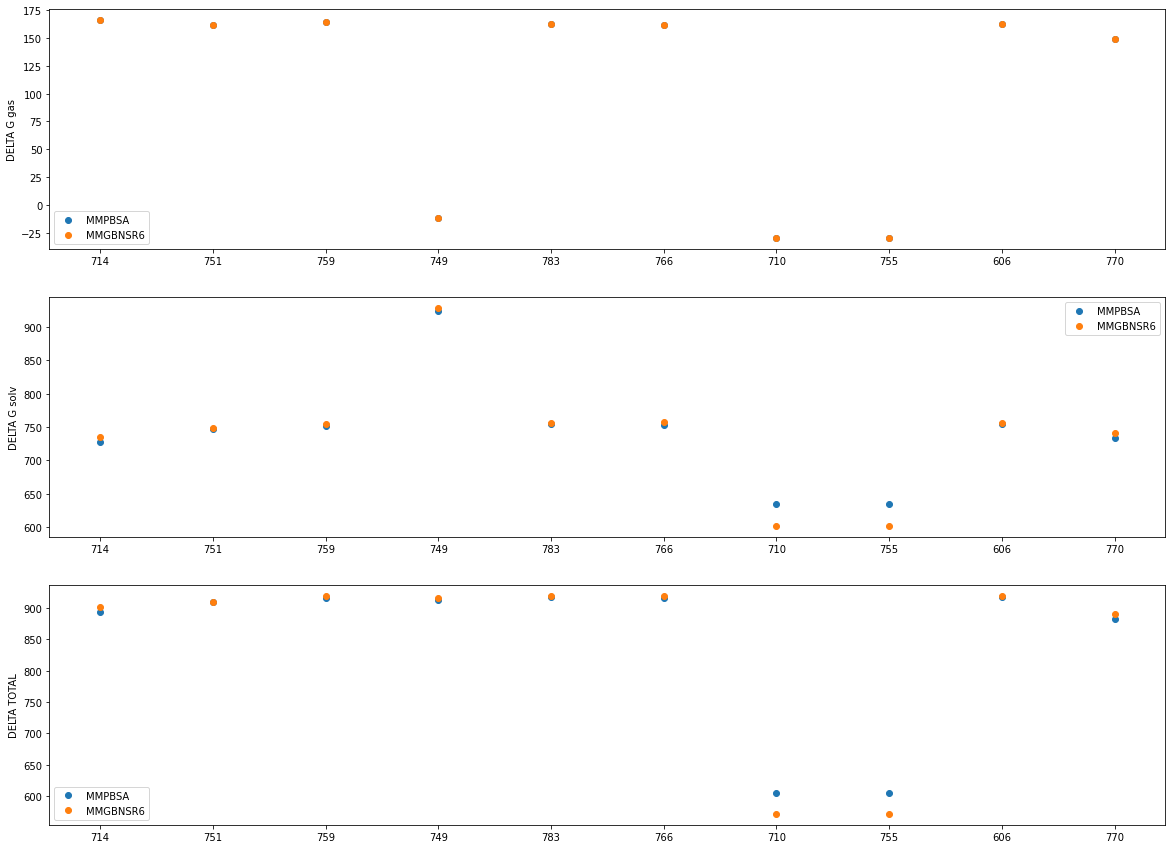

In [11]:
all_muts = mmgbsa_wild.keys()
fig, axs = plt.subplots(3)
plt.rcParams["figure.figsize"] = (20,15)
for i, param in enumerate(['Differences (Complex - Receptor - Ligand)' + x for x in ['_DELTA G gas', '_DELTA G solv', '_DELTA TOTAL']]):
    axs[i].plot(all_muts, [mmpbsa_mut[mut][param] for mut in all_muts], 'o', label='MMPBSA')
#     axs[i].plot([mmgbsa_mut[mut][param] for mut in all_muts], 'o', label='MMPGSA')
    axs[i].plot(all_muts, [gbnsr6_mut[mut][param] for mut in all_muts], 'o', label='MMGBNSR6')
    default_x_ticks = range(len(all_muts))
#     axs[i].set_xticklabels(sorted(all_muts))
    axs[i].set_ylabel(param.split('_')[1])
    axs[i].legend()
    axs[i].plot()

[]

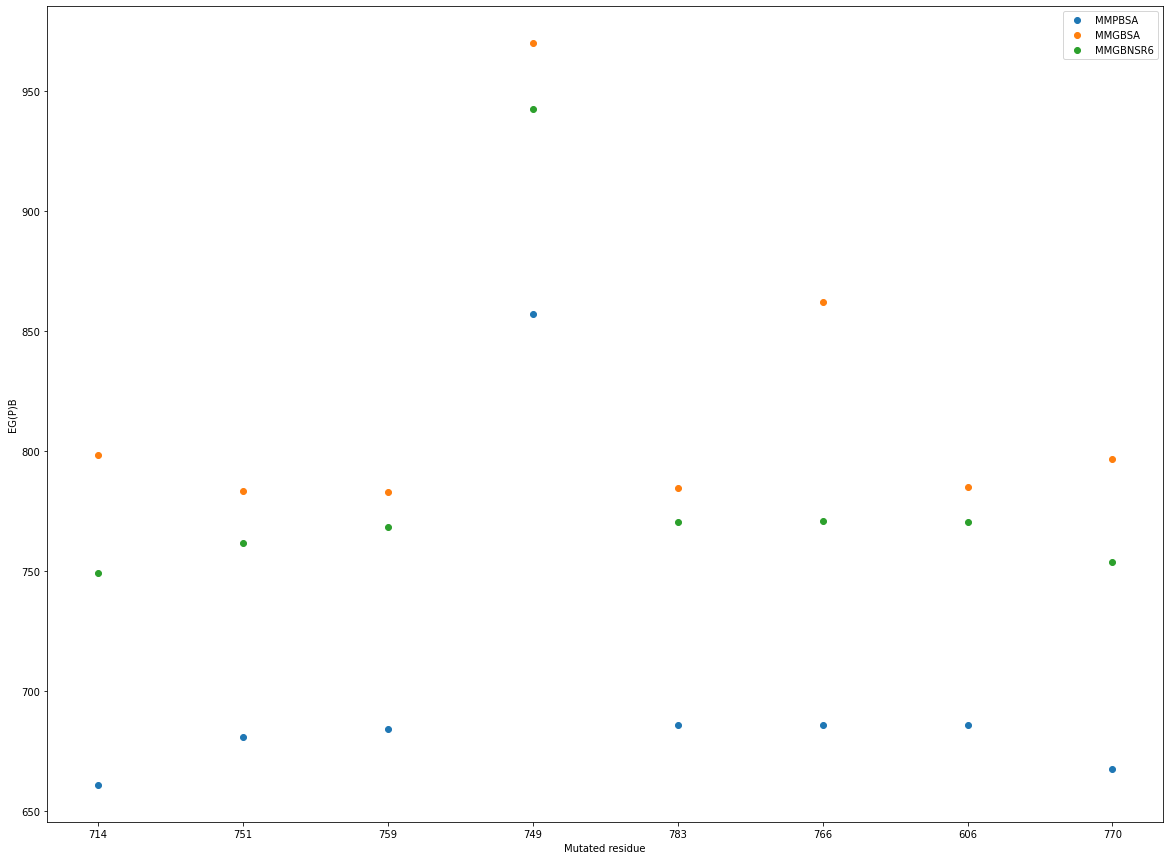

In [98]:
all_muts = list(mmgbsa_wild.keys())

all_muts.remove('710')
all_muts.remove('755')
plt.rcParams["figure.figsize"] = (20,15)
plt.plot([mmpbsa_mut[mut]['Differences (Complex - Receptor - Ligand)_EPB'] for mut in all_muts], 'o', label='MMPBSA')
plt.plot([mmgbsa_mut[mut]['Differences (Complex - Receptor - Ligand)_EGB'] for mut in all_muts], 'o', label='MMGBSA')
plt.plot([gbnsr6_mut[mut]['Differences (Complex - Receptor - Ligand)_EGB'] for mut in all_muts], 'o', label='MMGBNSR6')
default_x_ticks = range(len(all_muts))
plt.xticks(default_x_ticks, all_muts)
plt.ylabel('EG(P)B')
plt.xlabel('Mutated residue')
plt.legend()
plt.plot()

In [ ]:
[]